In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.shape

(918, 12)

In [10]:
X = df.drop(columns=('HeartDisease'), axis=1)
y = df['HeartDisease']

In [11]:
X.shape, y.shape

((918, 11), (918,))

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
X = X.apply(LabelEncoder().fit_transform)

In [14]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape

((734, 11), (184, 11))

In [18]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
X_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0])

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

In [23]:
X_test[100]

array([0.20833333, 1.        , 0.33333333, 0.33333333, 0.4479638 ,
       0.        , 1.        , 0.61016949, 0.        , 0.57692308,
       1.        ])

In [25]:
import tensorflow as tf
from tensorflow import keras

In [33]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [34]:
model.compile(optimizer=tf.optimizers.Adam(), loss= tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [39]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test,y_test))

Epoch 1/100
147/147 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.8747 - val_loss: 0.3756 - val_accuracy: 0.8804
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8760 - val_loss: 0.3574 - val_accuracy: 0.9076
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8719 - val_loss: 0.3118 - val_accuracy: 0.8913
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8869 - val_loss: 0.3208 - val_accuracy: 0.8913
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.8760 - val_loss: 0.3065 - val_accuracy: 0.8913
Epoch 6/100
147/147 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8828 - val_loss: 0.3358 - val_accuracy: 0.8913
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8828 - val_loss: 0.3634 - val_accuracy: 0.8804

In [40]:
import matplotlib.pyplot as plt

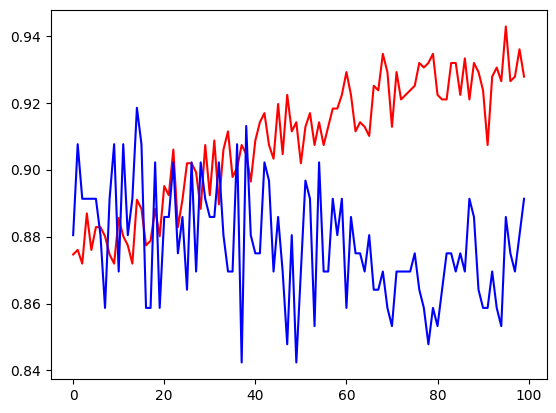

In [41]:
plt.plot(hist.history['accuracy'], color='red')
plt.plot(hist.history['val_accuracy'], color='blue')